In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('111.csv')
df.tail(10)

,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Earnings,CAPE
1751,2016.12,2246.63,45.700000,94.550000,241.4320,2016.958333,2.49,2288.071759,46.542991,96.294087,27.865098
1752,2017.01,2275.12,45.926667,96.463333,242.8390,2017.041667,2.43,2303.662174,46.502833,97.673500,28.063574
1753,2017.02,2329.91,46.153333,98.376667,243.6030,2017.125000,2.42,2351.740682,46.585779,99.298432,28.655107
1754,2017.03,2366.82,46.380000,100.290000,243.8010,2017.208333,2.48,2387.056325,46.776549,101.147480,29.086922
1755,2017.04,2359.31,46.660000,NaN,244.5240,2017.291667,2.30,2372.446545,46.919801,NaN,28.904246
1756,2017.05,2395.35,46.940000,NaN,244.7330,2017.375000,2.30,2406.630215,47.161050,NaN,29.373471
1757,2017.06,2433.99,47.220000,NaN,244.9550,2017.458333,2.19,2443.235893,47.399373,NaN,29.875201
1758,2017.07,2454.10,NaN,NaN,244.7860,2017.541667,2.32,2465.123028,NaN,NaN,30.201022
1759,2017.08,2456.22,NaN,NaN,245.5190,2017.625000,2.21,2459.886538,NaN,NaN,30.188305
1760,2017.09,2500.23,NaN,NaN,245.8855,2017.708333,2.16,2500.230000,NaN,NaN,30.729188


In [2]:
aa=[1947.03]
for i in range(1, 142):
    if int(repr(aa[i-1])[-1])==3:
        temp=aa[i-1]+0.06
        aa.append(temp)
    else:
        temp=aa[i-1]+1-0.06
        aa.append(temp)

bb=np.empty(142)
d = {'Date' : aa, 'value' : bb}
new=pd.DataFrame(d, index=aa)
new_one=pd.merge(new, df, how='left', on='Date')
new_one.tail(5)

,Date,value,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Earnings,CAPE
137,2015.09,0.0,1944.41,42.51,90.66,237.9450,2015.708333,2.17,2009.297212,43.928608,93.685429,24.496752
138,2016.03,0.0,2021.95,43.88,86.44,238.1320,2016.208333,1.89,2087.784030,45.308718,89.254458,25.372299
139,2016.09,0.0,2157.69,45.03,89.09,241.4280,2016.708333,1.63,2197.527563,45.861392,90.734874,26.727873
140,2017.03,0.0,2366.82,46.38,100.29,243.8010,2017.208333,2.48,2387.056325,46.776549,101.147480,29.086922
141,2017.09,0.0,2500.23,NaN,NaN,245.8855,2017.708333,2.16,2500.230000,NaN,NaN,30.729188


In [3]:
def P_E(x, y):
    return x/y
new_one['P_E']=new_one.apply(lambda row: P_E(row['P'], row['E']), axis=1)
def new_PE(x):
    if x<80:
        return x
    else:
        return  10+20*np.random.rand()
new_one['new_PE']=new_one.apply(lambda row: new_PE(row['P_E']), axis=1)
new_one.tail()

,Date,value,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Earnings,CAPE,P_E,new_PE
137,2015.09,0.0,1944.41,42.51,90.66,237.9450,2015.708333,2.17,2009.297212,43.928608,93.685429,24.496752,21.447276,21.447276
138,2016.03,0.0,2021.95,43.88,86.44,238.1320,2016.208333,1.89,2087.784030,45.308718,89.254458,25.372299,23.391370,23.391370
139,2016.09,0.0,2157.69,45.03,89.09,241.4280,2016.708333,1.63,2197.527563,45.861392,90.734874,26.727873,24.219217,24.219217
140,2017.03,0.0,2366.82,46.38,100.29,243.8010,2017.208333,2.48,2387.056325,46.776549,101.147480,29.086922,23.599761,23.599761
141,2017.09,0.0,2500.23,NaN,NaN,245.8855,2017.708333,2.16,2500.230000,NaN,NaN,30.729188,NaN,14.182214


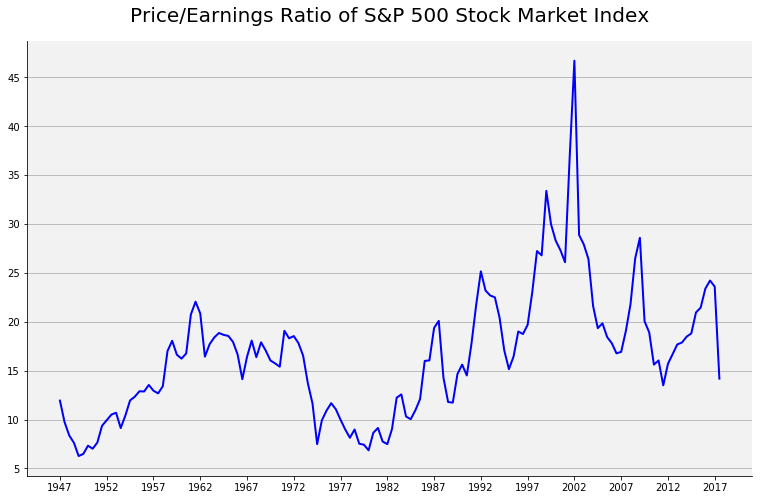

In [4]:
import matplotlib.pyplot as plt
aaa=np.linspace(1947, 2017.5, 142)
fig, ax =plt.subplots(figsize=(13, 8))
ax.plot(aaa, new_one['new_PE'], color='blue', lw=2)
label_2=np.linspace(1947, 2017, 15)
ax.set_xticks(label_2)
ax.set_title('Price/Earnings Ratio of S&P 500 Stock Market Index', fontsize=20, position=[.5, 1.03])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)
ax.yaxis.grid()
plt.show()
plt.savefig('P_E.jpg', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')

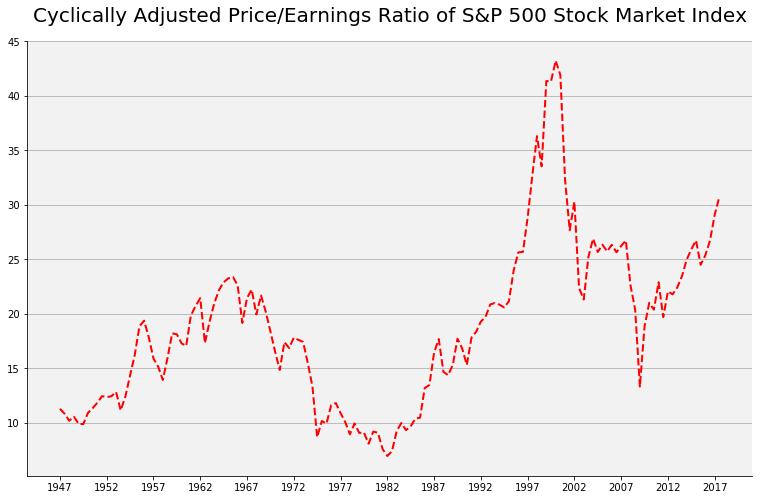

In [5]:
aaa=np.linspace(1947, 2017.5, 142)
fig, ax =plt.subplots(figsize=(13, 8))
ax.plot(aaa, new_one['CAPE'], color='red', lw=2, linestyle='--')
label_2=np.linspace(1947, 2017, 15)
ax.set_xticks(label_2)
ax.set_title('Cyclically Adjusted Price/Earnings Ratio of S&P 500 Stock Market Index', fontsize=20, position=[.5, 1.03])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)
ax.yaxis.grid()
plt.show()
plt.savefig('CAPE.jpg', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')

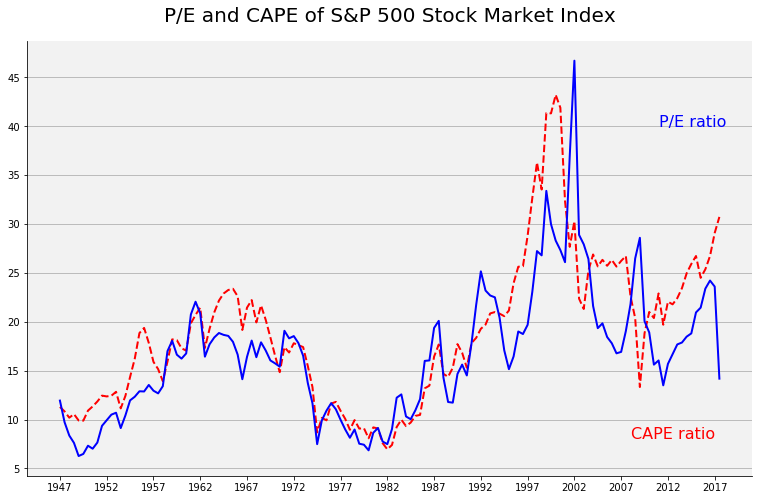

In [6]:
aaa=np.linspace(1947, 2017.5, 142)
fig, ax =plt.subplots(figsize=(13, 8))
ax.plot(aaa, new_one['CAPE'], color='red', lw=2, linestyle='--')
ax.plot(aaa, new_one['new_PE'], color='blue', lw=2)
label_2=np.linspace(1947, 2017, 15)
ax.set_xticks(label_2)
ax.set_title('P/E and CAPE of S&P 500 Stock Market Index', fontsize=20, position=[.5, 1.03])
ax.text(2008, 8, 'CAPE ratio', fontsize=16, color='red')
ax.text(2011, 40, 'P/E ratio', fontsize=16, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)
ax.yaxis.grid()
plt.show()
plt.savefig('P_E_CAPE.jpg', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')

In [8]:
def D_P(x, y):
    return x/y*100
new_one['D_P']=new_one.apply(lambda row: D_P(row['D'], row['P']), axis=1)
def E_P(x):
    return 1/x*100
new_one['E_P']=new_one.apply(lambda row: E_P(row['new_PE']), axis=1)
new_one.tail(30)

,Date,value,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Earnings,CAPE,P_E,new_PE,D_P,E_P
112,2003.03,4.753271e-312,846.63,16.22,30.32,184.2000,2003.208333,3.81,1130.152231,21.651807,40.473661,21.309719,27.923153,27.923153,1.915831,3.581257
113,2003.09,0.000000e+00,1019.44,16.59,38.58,185.2000,2003.708333,4.27,1353.485497,22.026136,51.221720,25.243687,26.424054,26.424054,1.627364,3.784431
114,2004.03,1.121529e-321,1123.98,18.02,52.00,187.4000,2004.208333,3.83,1474.761923,23.643846,68.228634,26.886530,21.615000,21.615000,1.603231,4.626417
115,2004.09,4.233422e-308,1117.66,19.16,57.77,189.9000,2004.708333,4.13,1447.163707,24.808669,74.801503,25.668407,19.346720,19.346720,1.714296,5.168835
116,2005.03,8.866953e-292,1194.90,20.23,60.22,193.3000,2005.208333,4.50,1519.961635,25.733387,76.602301,26.339142,19.842245,19.842245,1.693029,5.039752
117,2005.09,0.000000e+00,1225.92,21.47,66.47,198.8000,2005.708333,4.20,1516.277425,26.555139,82.213326,25.730123,18.443207,18.443207,1.751338,5.422050
118,2006.03,0.000000e+00,1293.74,22.78,72.67,199.8000,2006.208333,4.72,1592.151686,28.034393,89.431928,26.327838,17.802945,17.802945,1.760787,5.617048
119,2006.09,0.000000e+00,1317.74,24.10,78.57,202.9000,2006.708333,4.72,1596.910590,29.205720,95.215494,25.644156,16.771541,16.771541,1.828889,5.962481
120,2007.03,0.000000e+00,1406.95,25.49,83.15,205.3520,2007.208333,4.56,1684.661480,30.521355,99.562601,26.227606,16.920625,16.920625,1.811720,5.909947
121,2007.09,0.000000e+00,1497.12,26.98,78.60,208.4900,2007.708333,4.52,1765.648711,31.819228,92.697973,26.725743,19.047328,19.047328,1.802127,5.250080


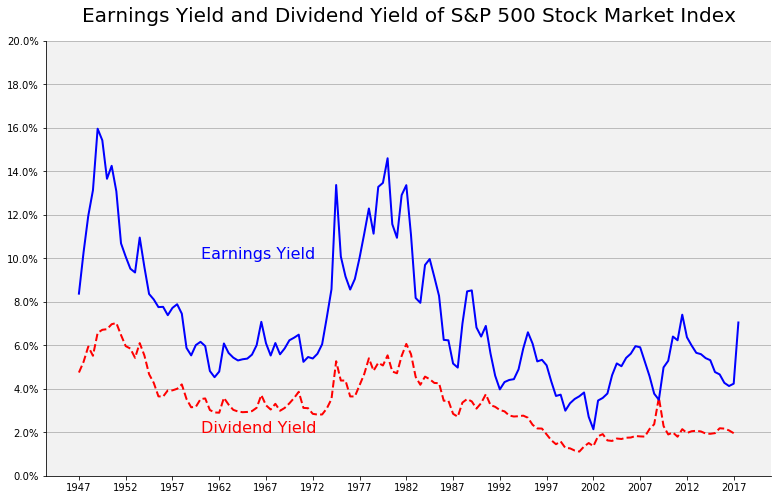

In [10]:
aaa=np.linspace(1947, 2017.5, 142)
fig, ax =plt.subplots(figsize=(13, 8))
ax.plot(aaa, new_one['D_P'], color='red', lw=2, linestyle='--')
ax.plot(aaa, new_one['E_P'], color='blue', lw=2)
label_2=np.linspace(1947, 2017, 15)
label_3=np.linspace(0, 20, 11)
label_33=[]
for i in label_3:
    label_33.append(str(i)+'%')
ax.set_yticks(label_3)
ax.set_yticklabels(label_33)
ax.set_xticks(label_2)
ax.set_title('Earnings Yield and Dividend Yield of S&P 500 Stock Market Index', fontsize=20, position=[.5, 1.03])
ax.text(1960, 2, 'Dividend Yield', fontsize=16, color='red')
ax.text(1960, 10, 'Earnings Yield', fontsize=16, color='blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)
ax.yaxis.grid()
plt.show()
plt.savefig('D_P_E_P.jpg', dpi=300, facecolor=fig.get_facecolor(), edgecolor='none')